# Starbucks Project

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
portfolio.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [4]:
portfolio.reward.unique()

array([10,  0,  5,  3,  2])

In [5]:
portfolio.duration.unique()

array([ 7,  5,  4, 10,  3])

In [6]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [7]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [8]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [9]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [10]:
from sklearn.metrics import fbeta_score, accuracy_score, f1_score
from time import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

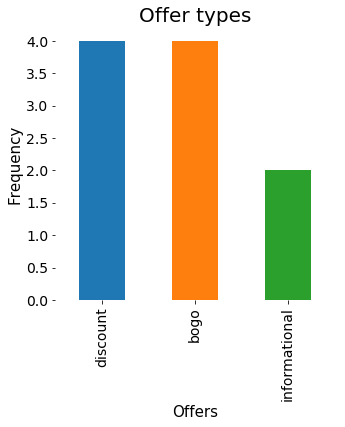

In [11]:
ax = portfolio["offer_type"].value_counts().plot.bar(
    figsize=(5,5),
    fontsize=14
)
ax.set_title("Offer types", fontsize=20)
ax.set_xlabel("Offers", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)


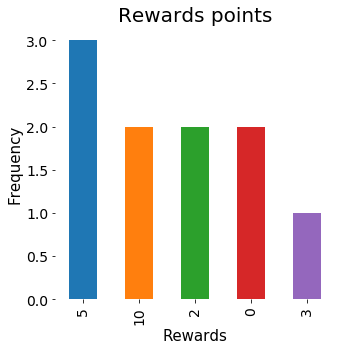

In [12]:
ay = portfolio["reward"].value_counts().plot.bar(
    figsize=(5,5),
    fontsize=14
)
ay.set_title("Rewards points", fontsize=20)
ay.set_xlabel("Rewards", fontsize=15)
ay.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)

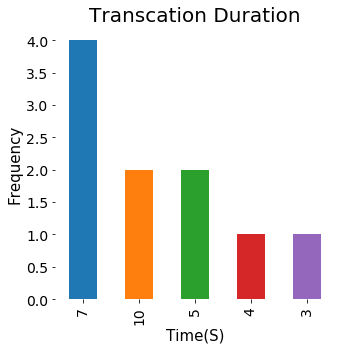

In [13]:
az = portfolio["duration"].value_counts().plot.bar(
    figsize=(5,5),
    fontsize=14
)
az.set_title("Transcation Duration", fontsize=20)
az.set_xlabel("Time(S)", fontsize=15)
az.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)

In [14]:
reward_points =  portfolio["reward"].value_counts()
print(reward_points)
transcation_time = portfolio["duration"].value_counts()
print(transcation_time)

5     3
10    2
2     2
0     2
3     1
Name: reward, dtype: int64
7     4
10    2
5     2
4     1
3     1
Name: duration, dtype: int64


From the above three graphs I gather that that most of the customers average time to compelete the process/transcation is 7 seconds
and the most of the customers get the rewards of 5 units/points, Now I will be using one-hot-encoding technique to split the columns entires to new features for 
better understanding of the type of communication used by starbucks to reach their customers regarding their offer

In [15]:
def clean_portfolio(df=portfolio):
    
    # One-hot encode channels column
    
    channels = portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    
    # One-hot encode offer_type column
    offer_type = pd.get_dummies(portfolio['offer_type'])
    
    # Concatinating one-hot and df
    new_df = pd.concat([df, channels, offer_type], axis=1, sort=False)
    
    # Removing channels and offer_type
    new_df = new_df.drop(['channels', 'offer_type'], axis=1)
    
    # Organizing columns
    columns = ["id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "bogo", "discount", "informational"]
    new_df = new_df[columns]
    
    return new_df

In [16]:
cleaned_portfolio= clean_portfolio() 
cleaned_portfolio.head()

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0


In [17]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [18]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [19]:
print(profile['gender'].value_counts())

M    8484
F    6129
O     212
Name: gender, dtype: int64


In [20]:
print(profile['income'].value_counts())

73000.0     314
72000.0     297
71000.0     294
57000.0     288
74000.0     282
53000.0     282
56000.0     281
52000.0     281
54000.0     272
70000.0     270
51000.0     268
61000.0     258
64000.0     258
55000.0     254
50000.0     253
60000.0     251
59000.0     243
75000.0     243
67000.0     242
58000.0     239
65000.0     238
62000.0     229
68000.0     228
31000.0     223
66000.0     222
32000.0     216
33000.0     213
39000.0     209
37000.0     209
63000.0     206
           ... 
82000.0     126
95000.0     126
97000.0     124
99000.0     123
90000.0     114
98000.0     112
94000.0     106
91000.0     106
30000.0      88
100000.0     87
109000.0     62
103000.0     59
118000.0     58
110000.0     58
105000.0     58
108000.0     57
106000.0     56
111000.0     55
104000.0     55
113000.0     54
119000.0     54
114000.0     53
115000.0     50
101000.0     48
102000.0     48
116000.0     46
107000.0     45
112000.0     45
117000.0     32
120000.0     13
Name: income, Length: 91

In [21]:
profile.shape

(17000, 5)

In [22]:
print(profile['age'].value_counts())

118    2175
58      408
53      372
51      363
54      359
59      359
57      353
52      351
55      350
56      342
63      338
60      333
49      321
62      318
67      317
64      311
61      309
48      288
50      284
66      284
65      280
68      259
70      252
69      242
47      232
45      231
71      230
42      227
43      215
46      212
       ... 
22      131
30      131
29      129
23      126
81      118
35      118
79      117
80      116
31      113
82      105
83      102
84       83
18       70
85       70
87       66
88       64
86       54
89       53
90       52
91       47
92       40
94       33
93       29
95       22
97       13
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64


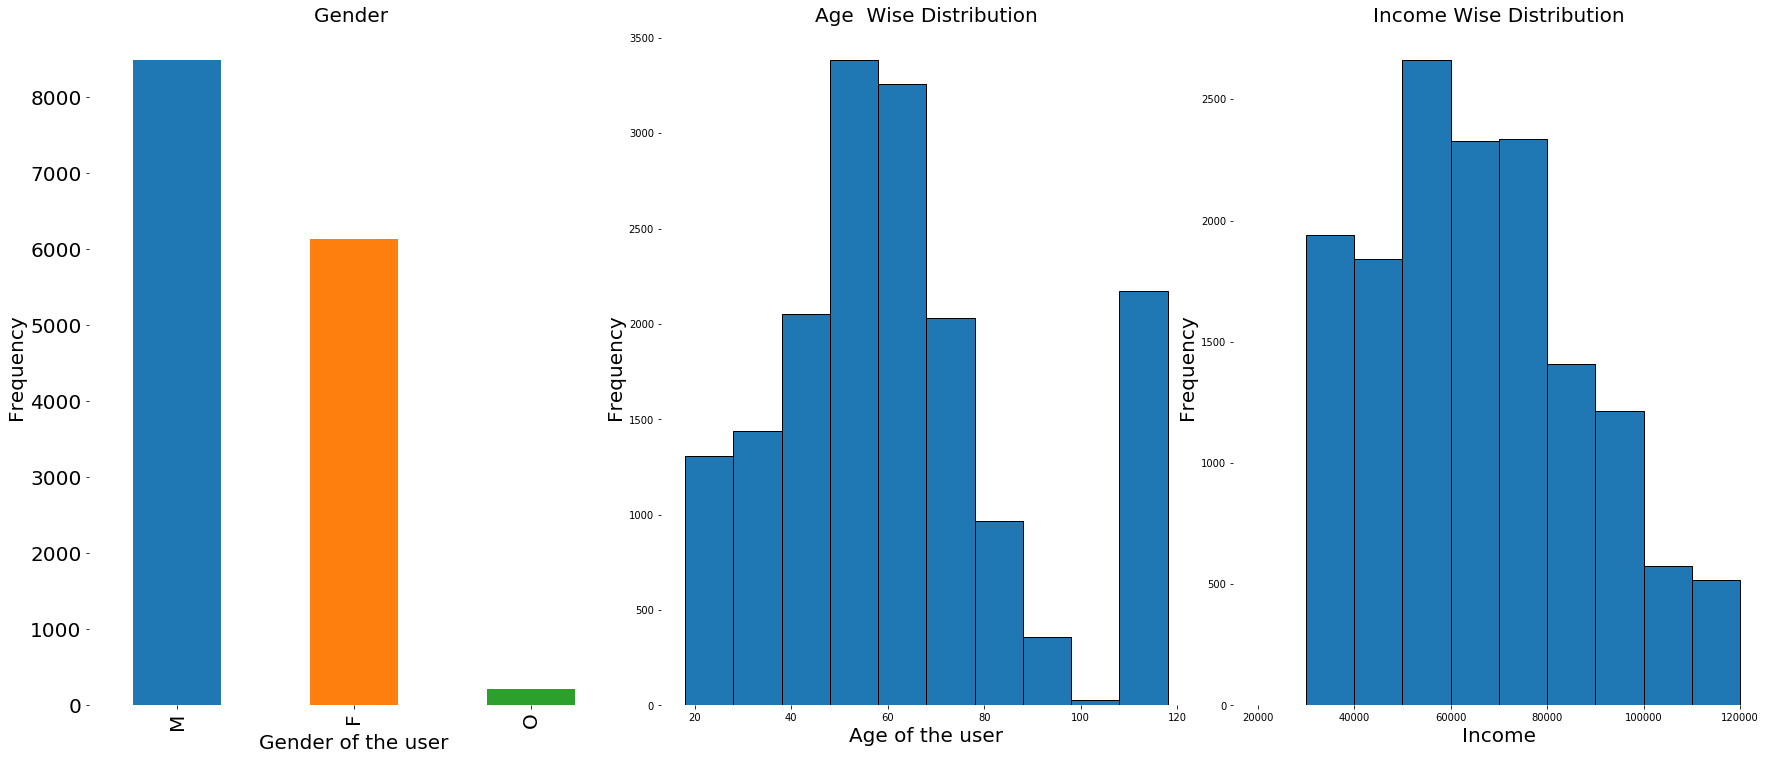

In [23]:
#Bar graphs


fig,ax= plt.subplots(1,3,sharex=False, sharey=False,figsize=(24,10))
fig.tight_layout()
# For GENDER
profile.gender.value_counts().plot.bar(ax=ax[0],fontsize=20) 
ax[0].set_title("Gender ", fontsize=20,color='black')
ax[0].set_xlabel("Gender of the user", fontsize=20)
ax[0].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)


# For AGE
profile.age.plot.hist(ax=ax[1],fontsize=10,edgecolor='black') 
ax[1].set_title("Age  Wise Distribution", fontsize=20,color='black')
ax[1].set_xlabel("Age of the user", fontsize=20)
ax[1].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)

# For INCOME
profile.income.plot.hist(ax=ax[2],fontsize=10,edgecolor='black',range=(20000, 120000)) 
ax[2].set_title("Income Wise Distribution", fontsize=20,color='black')
ax[2].set_xlabel("Income", fontsize=20)
ax[2].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)
plt.show()

In [24]:
profile[profile['age']==118]

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN
10,118,20170824,None,c4863c7985cf408faee930f111475da3,NaN
11,118,20150919,None,148adfcaa27d485b82f323aaaad036bd,NaN
17,118,20170801,None,744d603ef08c4f33af5a61c8c7628d1c,NaN
23,118,20170907,None,2b826eba31074a059d63b0ae8f50b7d5,NaN


As we can see all enteries with age 118 have no gender or income. 

In [25]:
profile[(profile['age']>80) & (profile['age']<118)]

,age,became_member_on,gender,id,income
33,96,20171117,F,868317b9be554cb18e50bc68484749a2,89000.0
94,89,20171114,F,4264b1d027cc493281bba4f44bfedaca,87000.0
98,90,20151210,F,1c587de019994f93a242c6864fd7bc55,98000.0
126,83,20180127,M,4c29d22467af4d7faa137c4eedd65340,46000.0
131,89,20180114,F,3dae0eadb47149b0b9b548d14548524b,65000.0
167,85,20180726,M,4e233f02eff840c7a3e5ec15d55d7d23,67000.0
186,82,20161231,M,c79da41557894c7eacc5c0156dc1f4dc,87000.0
202,81,20180503,M,accec36a10704e1fbaeb9b28b8bc5da8,93000.0
210,82,20180319,M,d2e88e95c0ae41c0980e4cfc10d162d8,73000.0
214,82,20180108,M,5a3d291f75984396b6eb2800206ec716,72000.0


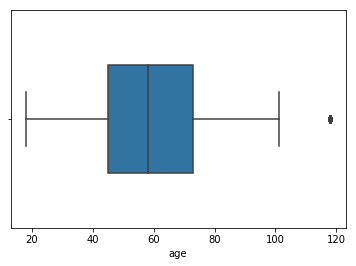

In [26]:
sns.boxplot(profile['age'], width=0.5)

In [27]:
new_df = profile.drop(profile[(profile["income"].isnull()) & (profile["age"] == 118)].index)

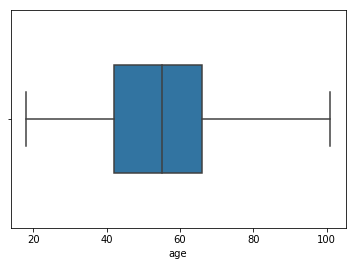

In [28]:
sns.boxplot(new_df['age'], width=0.5)

In [29]:
new_df.isnull().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

In [30]:
new_df.head()

,age,became_member_on,gender,id,income
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


In [31]:
new_df.shape

(14825, 5)

In [32]:
def clean_profile(profile = profile):

    # droping lines with income = NaN and age == 118(because null values are stored here)
    new_df = profile.drop(profile[(profile["income"].isnull()) & (profile["age"] == 118)].index)
    
    # One-hot encode Gender column
    gender_dummies = pd.get_dummies(new_df["gender"])
    
    # Specifying age range and one hot encoding
    range_ages = pd.cut(x=new_df["age"], bins=[18, 20, 29, 39, 49, 59, 69, 79, 89, 99, 102])
    # One-hot encode age column
    ages_dummies = pd.get_dummies(range_ages)
    
    # Specifying income range and one hot encoding
   
    range_income = pd.cut(x=new_df["income"], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000])
    income_dummies = pd.get_dummies(range_income)
    

    # Concatinate
    new_df = pd.concat([new_df, ages_dummies, income_dummies, gender_dummies], axis=1, sort=False)
    
    # Dropping age,gender,income column from the dataset
    new_df = new_df.drop(["age", "gender", "income"], axis=1)
    
    return new_df

In [33]:
cleaned_profile = clean_profile()
cleaned_profile.head()

,became_member_on,id,"(18, 20]","(20, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 89]",...,"(50000, 60000]","(60000, 70000]","(70000, 80000]","(80000, 90000]","(90000, 100000]","(100000, 110000]","(110000, 120000]",F,M,O
1,20170715,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,20170509,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,20180426,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,20180209,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12,20171111,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [34]:
cleaned_profile.isnull().sum()

became_member_on    0
id                  0
(18, 20]            0
(20, 29]            0
(29, 39]            0
(39, 49]            0
(49, 59]            0
(59, 69]            0
(69, 79]            0
(79, 89]            0
(89, 99]            0
(99, 102]           0
(30000, 40000]      0
(40000, 50000]      0
(50000, 60000]      0
(60000, 70000]      0
(70000, 80000]      0
(80000, 90000]      0
(90000, 100000]     0
(100000, 110000]    0
(110000, 120000]    0
F                   0
M                   0
O                   0
dtype: int64

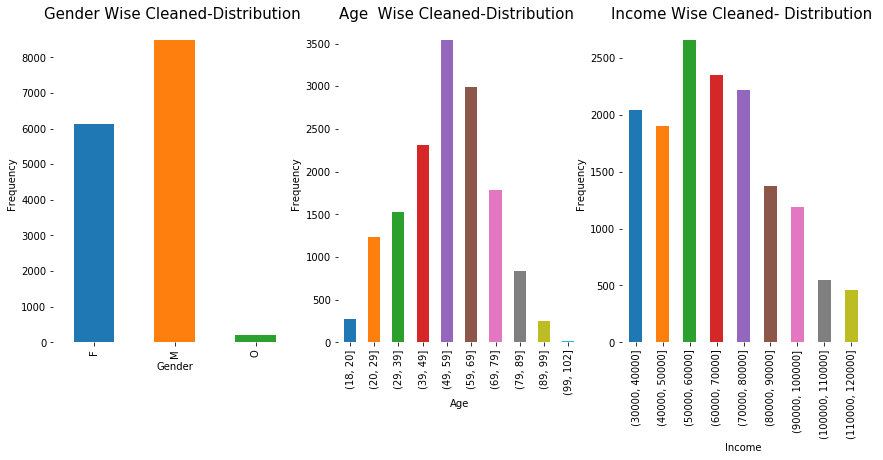

In [35]:
fig,ax= plt.subplots(1,3,sharex=False, sharey=False,figsize=(12,5))
fig.tight_layout()
# Based on GENDER
cleaned_profile[cleaned_profile.columns[21:]].sum().plot.bar(ax=ax[0],fontsize=10) 
ax[0].set_title("Gender Wise Cleaned-Distribution ", fontsize=15,color='black')
ax[0].set_xlabel("Gender", fontsize=10)
ax[0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# Based on AGE
cleaned_profile[cleaned_profile.columns[2:12]].sum().plot.bar(ax=ax[1],fontsize=10) 
ax[1].set_title("Age  Wise Cleaned-Distribution ", fontsize=15,color='black')
ax[1].set_xlabel("Age", fontsize=10)
ax[1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# Based on INCOME
cleaned_profile[cleaned_profile.columns[12:21]].sum().plot.bar(ax=ax[2],fontsize=10) 
ax[2].set_title("Income Wise Cleaned- Distribution ", fontsize=15,color='black')
ax[2].set_xlabel("Income", fontsize=10)
ax[2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)
plt.show()

# Cleaning transcripts

In [36]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [37]:
def create_offer_id_column(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
def create_amount_column(val):
    if list(val.keys())[0] in ["amount"]:
        return list(val.values())[0] 

In [40]:
def clean_transcript(transcript = transcript):

    #
    transcript['offer_id'] = transcript.value.apply(create_offer_id_column)
    transcript['amount'] = transcript.value.apply(create_amount_column)
    
    #  One hot encoding event column
    event = pd.get_dummies(transcript['event'])
    
    # Concatinating one hot and created dataframe
    new_df = pd.concat([transcript, event], axis=1, sort=False)
    
    # Create and Drop Transaction
    transaction = new_df[new_df["transaction"]==1]
    new_df = new_df.drop(transaction.index)
    
    # Drop
    new_df = new_df.drop(columns = ["event","value", "amount", "transaction"])
    
    return new_df

In [41]:
cleaned_transcripts = clean_transcript()
cleaned_transcripts.head()

,person,time,offer_id,offer completed,offer received,offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0


In [42]:
cleaned_transcripts.shape


(167581, 6)

In [43]:
print(cleaned_transcripts['offer completed'].value_counts())

0    134002
1     33579
Name: offer completed, dtype: int64


In [46]:
def merge_data():
    # Rename column name id with offer_id
    new_portfolio = cleaned_portfolio.rename(columns={"id": "offer_id" })
    
    #  Merge cleand portfolio and transcript
    final_transcript = cleaned_transcripts.merge(new_portfolio[new_portfolio.columns])
    
    # Renme column id with person to merge with transcript dataset
    new_profile=cleaned_profile.rename(columns={"id": "person" })
    
    # Merge the profile with transcript on person column
    final_transcript = final_transcript.merge(new_profile[new_profile.columns])
    
    # Renaming columns (As I was getting error NOt in INdex error)
    columns_names = ['person', 'time', 'offer_id',  'offer completed', 'offer received',' offer viewed', 
         'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational','became_member_on',
          "18-20", "20-29", "29-39", "39-49", "49-59", "59-69", "69-79", "79-89", "89-99", "99-102", "30-40K", "40-50K", "50-60K",
           "60-70K", "70-80K", "80-90K", "90-100K", "100-110K", "110-120K",'F', 'M', 'O']
    
    final_transcript.columns = columns_names
    
    # Reorganizing columns
    cols_order = ['person', 'offer_id', 'time', 'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational',
          'became_member_on', "18-20", "20-29", "29-39", "39-49", "49-59", "59-69", "69-79", "79-89", "89-99", "99-102", 'F', 'M', 'O',
          "30-40K", "40-50K", "50-60K", "60-70K", "70-80K", "80-90K", "90-100K", "100-110K", "110-120K", 
          'offer received',' offer viewed', 'offer completed']     
    
    return final_transcript[cols_order]

In [47]:
merged_df = merge_data()

merged_df.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K,offer received,offer viewed,offer completed
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,504,5,5,5,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,510,5,5,5,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1


# Exploratory Data Analysis 

In [48]:
merged_df.describe()

,time,difficulty,duration,reward,email,mobile,social,web,bogo,discount,...,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K,offer received,offer viewed,offer completed
count,148805.000000,148805.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,...,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000
mean,354.570223,7.890561,6.625207,4.442445,1.0,0.917160,0.658311,0.806747,0.428978,0.418743,...,0.181358,0.159901,0.154551,0.099882,0.085407,0.037485,0.032042,0.446900,0.335069,0.218030
std,198.311301,5.041335,2.133035,3.372362,0.0,0.275641,0.474277,0.394851,0.494932,0.493355,...,0.385316,0.366515,0.361478,0.299844,0.279487,0.189948,0.176112,0.497174,0.472016,0.412909
min,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,5.000000,5.000000,2.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,408.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,510.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,714.000000,20.000000,10.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
merged_df.columns

Index(['person', 'offer_id', 'time', 'difficulty', 'duration', 'reward',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational',
       'became_member_on', '18-20', '20-29', '29-39', '39-49', '49-59',
       '59-69', '69-79', '79-89', '89-99', '99-102', 'F', 'M', 'O', '30-40K',
       '40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K', '100-110K',
       '110-120K', 'offer received', ' offer viewed', 'offer completed'],
      dtype='object')

In [50]:
#Number of offer completed (offer redeemed )
completed_offer = merged_df[merged_df["offer completed"] == 1].shape[0]
print(completed_offer)

32444


In [51]:
# Number of incomplete offer
incomplete_offer=merged_df[merged_df["offer completed"] == 0].shape[0]
print(incomplete_offer)

116361


In [53]:
#Total Records
t_records=len(merged_df.index)
print(t_records)

148805


In [54]:
# Percetage of offer completed 
percent_completed = (completed_offer / t_records) * 100
print(percent_completed)

21.80303081213669


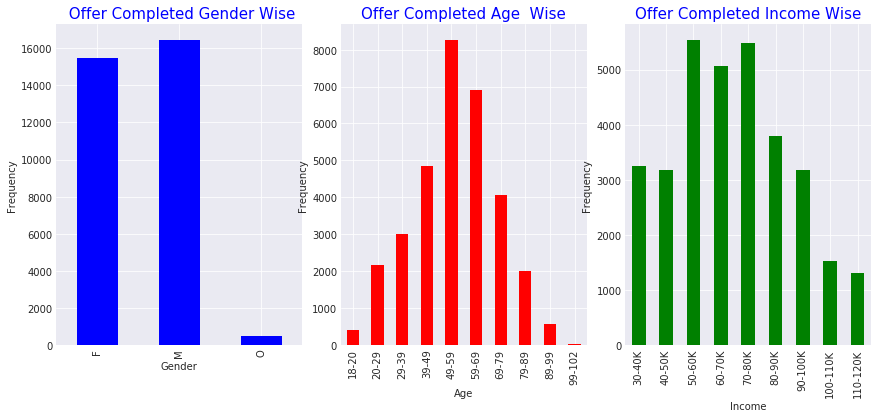

In [57]:
#Creating Subplots for distribution based on Gender,Age and Income for the Newly cleaned Profile data
sns.set_style('darkgrid')
fig,ax= plt.subplots(1,3,figsize=(12,5))
fig.tight_layout()


# BASED ON GENDER
merged_df[merged_df['offer completed']==1][['F','M','O']].sum().plot.bar(ax=ax[0],fontsize=10,color='blue') 
ax[0].set_title(" Offer Completed Gender Wise", fontsize=15,color='blue')
ax[0].set_xlabel("Gender", fontsize=10)
ax[0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# BASED ON AGE
age_cols=['18-20','20-29', '29-39', '39-49', '49-59', '59-69', '69-79', '79-89', '89-99','99-102']
merged_df[merged_df['offer completed']==1][age_cols].sum().plot.bar(ax=ax[1],fontsize=10,color='red') 
ax[1].set_title("Offer Completed Age  Wise", fontsize=15,color='blue')
ax[1].set_xlabel("Age", fontsize=10)
ax[1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# BASED ON INCOME
income_cols=['30-40K', '40-50K', '50-60K', '60-70K','70-80K', '80-90K', '90-100K', '100-110K','110-120K']
merged_df[merged_df['offer completed']==1][income_cols].sum().plot.bar(ax=ax[2],fontsize=10,color='green') 
ax[2].set_title("Offer Completed Income Wise", fontsize=15,color='blue')
ax[2].set_xlabel("Income", fontsize=10)
ax[2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)
plt.show()

1) From the above graphs it can be concluded that females are more attracted to the offers                                   
2) With age if we concentrate on the top three bins the maximum number of offer redeemed falls under 40 -70 bracket, however the people who fall under 50-60 years of age are observed to redeeme the maximum offer.                                        
3) With Income we can observe that generate around 50 -80k make the maximum use of offers. however it is observed that people generating around 50-60k a year have used the maximum offers. 

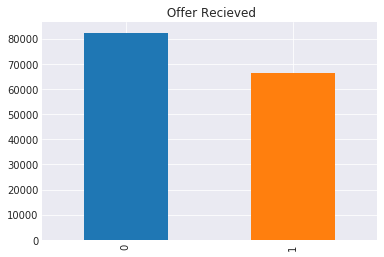

In [60]:
merged_df['offer received'].value_counts().plot.bar(title=' Offer Recieved')

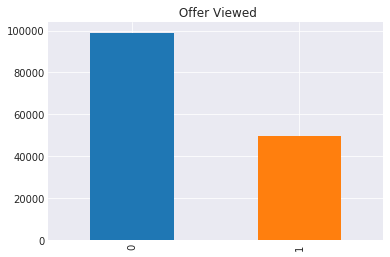

In [61]:
merged_df[' offer viewed'].value_counts().plot.bar(title=' Offer Viewed')

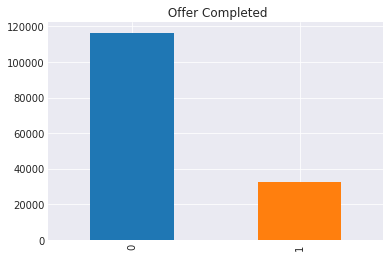

In [62]:
merged_df['offer completed'].value_counts().plot.bar(title=' Offer Completed')

From the above graphs we can conclude that most of the customers do not take the offers seriously. Almost half of the customers just view the offers and almost half of the customers who have viewed the offers redeeme the offer.    

In [63]:
merged_df['bogo'].value_counts()

0    84971
1    63834
Name: bogo, dtype: int64

In [64]:
merged_df['discount'].value_counts()

0    86494
1    62311
Name: discount, dtype: int64

In [65]:
merged_df['informational'].value_counts()

0    126145
1     22660
Name: informational, dtype: int64

It can be seen that 'buy one get one free' is the most loved offer and people also love discounts which can be seen with the numbers above. 

# Model prepartion 

In [66]:
# removing the unnecessary feature
merged_df = merged_df.drop(["offer received", ' offer viewed', 'informational', "became_member_on"], axis=1)

In [67]:
main_feature = merged_df['offer completed']
features = merged_df.drop('offer completed', axis = 1)
print(" Number of total features: {} ".format(len(features.columns)))

 Number of total features: 34 


In [68]:
features.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,O,30-40K,40-50K,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,7,5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,5,7,5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,5,7,5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,504,5,5,5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,510,5,5,5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [69]:
features.shape

(148805, 34)

In [70]:
#Normalizing Data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating scalar object

numericals = features.columns[2:6]

features_scaled = pd.DataFrame(data = features)
features_scaled[numericals] = scaler.fit_transform(features[numericals])

In [71]:
features_scaled.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,O,30-40K,40-50K,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.000000,0.25,0.571429,0.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.008403,0.25,0.571429,0.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.184874,0.25,0.571429,0.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,0.705882,0.25,0.285714,0.5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,0.714286,0.25,0.285714,0.5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [72]:
final_features=features_scaled[features_scaled.columns[2:]]

In [73]:
final_features.head()

,time,difficulty,duration,reward,email,mobile,social,web,bogo,discount,...,O,30-40K,40-50K,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K
0,0.000000,0.25,0.571429,0.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.008403,0.25,0.571429,0.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.184874,0.25,0.571429,0.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.705882,0.25,0.285714,0.5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.714286,0.25,0.285714,0.5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
# After normalizartion we will split the data using SK Learn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_features, 
                                                    main_feature, 
                                                    test_size = 0.25, 
                                                    random_state = 42,
                                                   stratify=main_feature)

In [76]:
X_train.shape


(111603, 32)

In [77]:
X_test.shape

(37202, 32)

In [78]:
# To do this we will create a function that train and test F1 along with the model name 
def train_test(clf):

    train_predictions =  (clf.fit(X_train, Y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, Y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(Y_train, train_predictions)*100
    test_f1_score    = fbeta_score(Y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

K neighbors is the apt model for this, as it is fast and accurate the model best suits for such supervised classification problems. 

In [79]:
from sklearn.neighbors import KNeighborsClassifier
clf_A = KNeighborsClassifier(n_neighbors = 5)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

In [80]:
knn = {'Benchmark Model': [ a_model], 'train F1 score':[a_train_f1], 'test F1 score': [a_test_f1]}
models = pd.DataFrame(knn)

In [81]:
models

,Benchmark Model,train F1 score,test F1 score
0,KNeighborsClassifier,84.58106,78.667814


# Random forest classifier Model

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf_B = RandomForestClassifier(random_state = 10)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

# Decision tree model

In [83]:
from sklearn.tree import DecisionTreeClassifier 
clf_C = DecisionTreeClassifier(random_state = 10)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

In [84]:
models = {'Model': ['KNeighborsClassifier (Benchmark)', b_model, c_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1] }
          
comparison = pd.DataFrame(models)

In [85]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier (Benchmark),84.581060,78.667814
1,RandomForestClassifier,91.734989,78.786087
2,DecisionTreeClassifier,92.813813,79.710768


From this comparision we can clearly see that DecisionTreeClassifier and RandomForestClassifier have almost similar result but DecisionTree is a bit better than RandomForestClassifier as it has achived a better accuracy SO DECISIONTREE would be a better classifying model